# Parkinsons Classification
I have chosen the parkinsons dataset which is composed of vocal attributes of patients with and without parkinsons. The problem at hand is to create a classification model to predict whether a patient has the parkinsons disease based off of their vocal attributes.


This dataset consists of 197 samples from individuals, with each sample labeled as either:

*  1 - Parkinsons Disease
*  0 - Healthy

It contains 23 features of vocal attributes. The target variable is 'Target'.

# Exploratory Data Analysis

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  Target      RPDE        D2       DFA  \
0

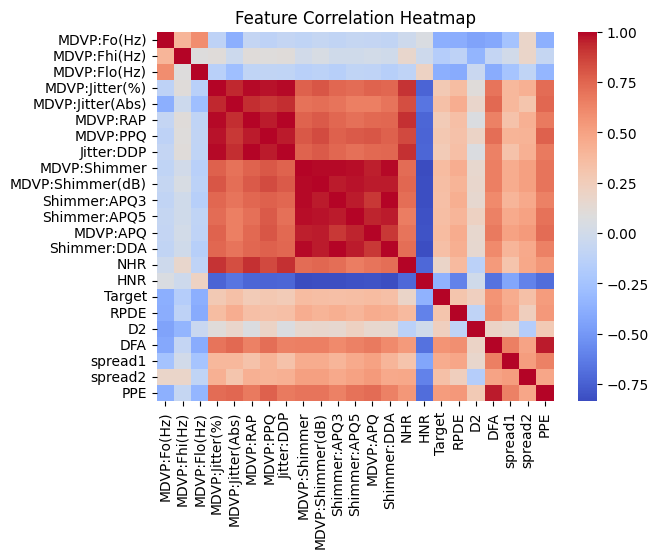

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

column_names = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)",
    "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer",
    "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA",
    "NHR", "HNR", "Target", "RPDE", "D2", "DFA", "spread1", "spread2", "PPE"]
data = pd.read_csv('parkinsons.csv', names=column_names, header=None)
print(data.head())
corr = data.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

Patients with parkinsons disease often exhibit lower fundamental frequencies in their speech, high levels of jitter and shimmer and NHR (noise-to-harmonics ratio) and a lower HNR (harmonics-to-noise ratio).

As you can see from the heatmap, shimmer attributes have positive correlation to each other and so do jitter attributes. This is expected as it is likely for a patient who exhibits one to exhibit the others due to them measuring attributes of their general symptoms; jitter and shimmer. HNR (harmonics-to-noise ratio) is also strongly negatively correlated with most other attributes which is expected as HNR indicates whether a patients voice is more harmonic and has less noise. This could indicate that HNR is a highly influential factor in predicting parkinsons as patients with a lower HNR are likely to exhibit all other symptoms related to parkinsons.

The correlations between the target (healthy or inflicted with parkinsons) and the attributes are strongest in fundamental frequencies of speech, PPE, DFA and HNR as parkinsons patients tend to have lower frequencies, HNR ratios therefore a negative correlation to whether a patient has parkinsons. And a positive correlation with DFA and PPE which capture noise irregularities commonly found within parkinsons patients.

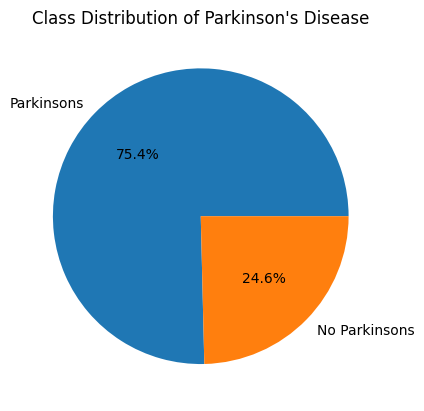

In [ ]:
plt.pie(x=data['Target'].value_counts(), labels=['Parkinsons', 'No Parkinsons'], autopct='%1.1f%%')
plt.title("Class Distribution of Parkinson's Disease")
plt.show()

As you can see from the class distributions, the dataset is imbalanced as 75% of the data belongs to parkinsons patients. This can negatively impact prediction models and cause them to be more biased towards the majority class (parkinsons patients). This might become an issue later on with a classification model as it could be a cause of false positives.

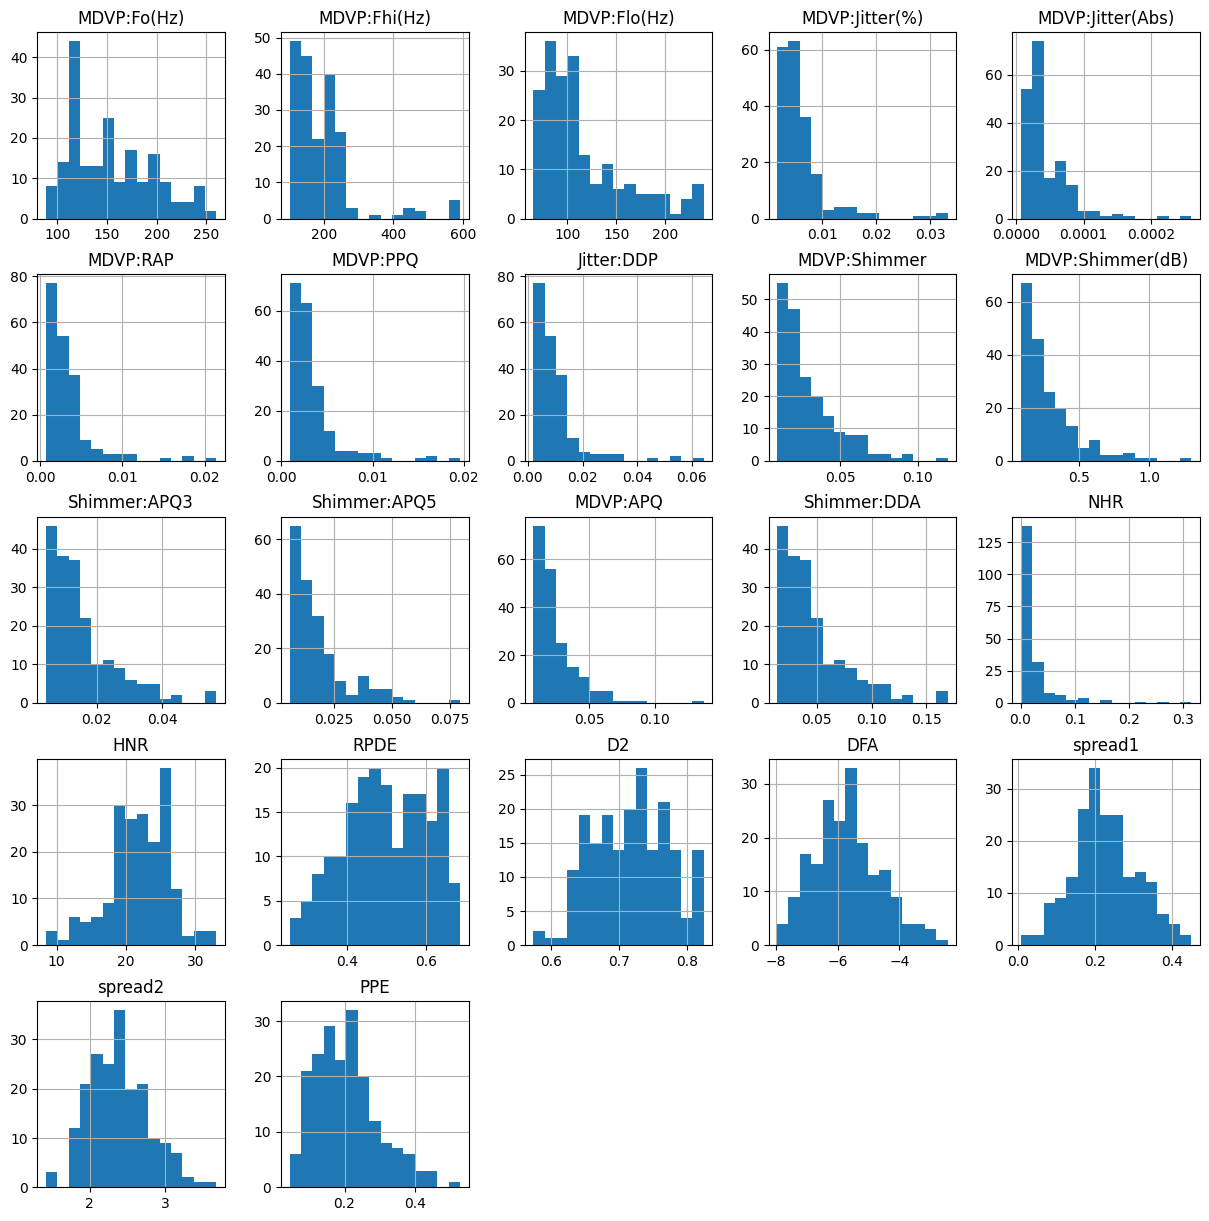

In [ ]:
features = data.drop(columns=['Target'])
target = data['Target']

features.hist(figsize=(15, 15), bins=15)
plt.title("Histogram of Features")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.show()

As you can see from the histograms of the features, jitter, shimmer and NHR and most frequency attributes are skewed right indicating lower mean values. This is unexpected as the dataset has a majority class of parkinsons patients that should cause the data to be left skewed towards higher jitter, shimmer and NHR values, this is also true for HNR but in reverse; it should be skewed right. To investigate this further a comparison of these features for healthy and parkinsons inflicted patients must be done.

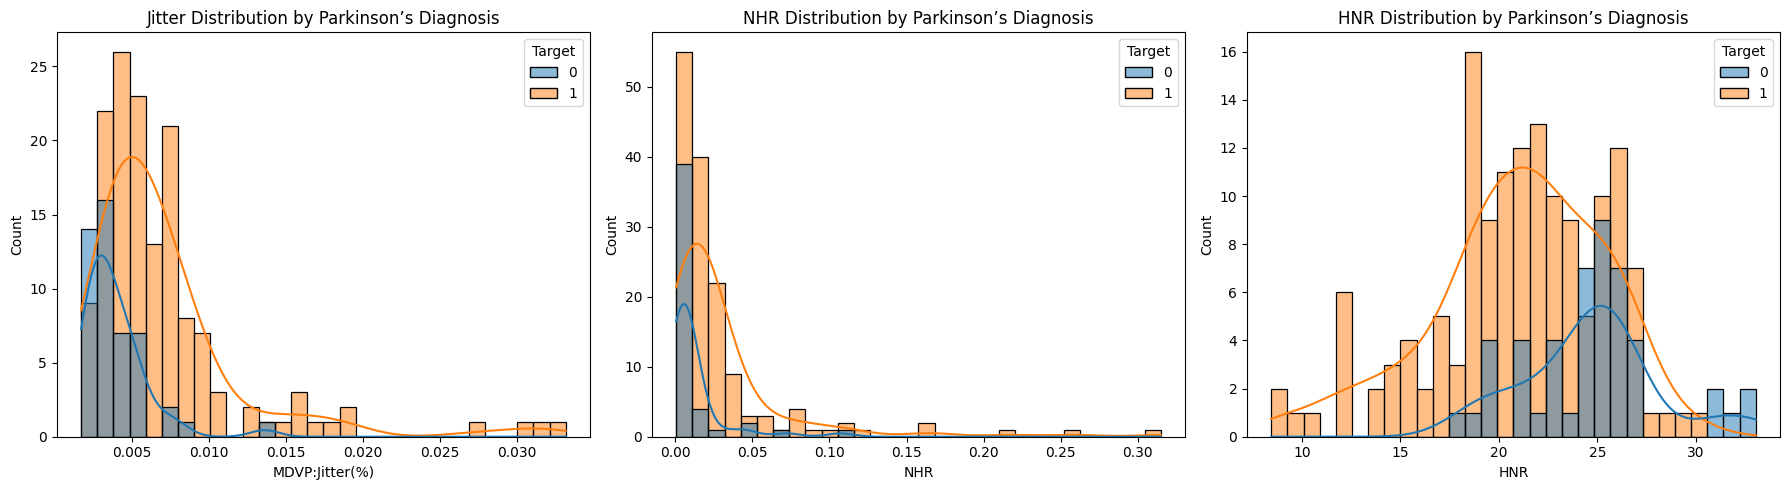

In [ ]:
plt.figure(figsize=(18, 5))

# Jitter Distribution
plt.subplot(1, 3, 1)
sns.histplot(data=data, x="MDVP:Jitter(%)", hue="Target", kde=True, bins=30)
plt.title("Jitter Distribution by Parkinson’s Diagnosis")

# NHR Distribution
plt.subplot(1, 3, 2)
sns.histplot(data=data, x="NHR", hue="Target", kde=True, bins=30)
plt.title("NHR Distribution by Parkinson’s Diagnosis")

# HNR Distribution
plt.subplot(1, 3, 3)
sns.histplot(data=data, x="HNR", hue="Target", kde=True, bins=30)
plt.title("HNR Distribution by Parkinson’s Diagnosis")

plt.tight_layout()
plt.show()

These histogram plots seperated by parkinsons and healthy patients show an expected outcome, parkinsons patients have a higher mean jitter and NHR however only by a slight difference to healthy patients. And a slightly bigger difference with lower HNR as expected. Indicating that the skewness in the data is likely due to milder cases of parkinsons in the dataset. And that HNR is more likely to be a more decisive factor of parkinsons prediction.

# Building The Model

For my model I have decided to use logistic regression for classifying whether a patient has parkinsons or not. I have chosen this due to need of binary classification. logistic regression is well suited for binary classification whereas other methods like linear regression perform poorly.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# splitting the data into an 80-20 train test split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# standardizing the features
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

model = LogisticRegression()
model.fit(features_train_scaled, target_train)

# testing the models predictions
target_predicted = model.predict(features_test_scaled)

accuracy = accuracy_score(target_test, target_predicted)


# Results

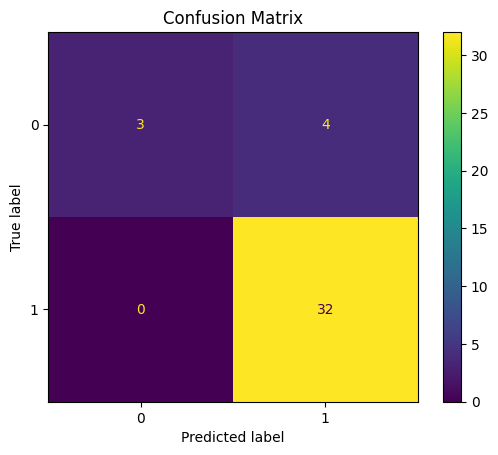


Accuracy: 0.8974358974358975

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(target_test, target_predicted)
plt.title("Confusion Matrix")
plt.show()

print(f"\nAccuracy: {accuracy}\n")
print(f"Classification Report:\n {classification_report(target_test, target_predicted)}")

# Conclusion

The logistic regression model performs relatively well in predicting parkinsons with a ~90% accuracy, however it performs poorly in the recall score for class 0 (healthy patients). The model is incorrectly classifying a significant number of healthy patients. only 43% of healthy patients are classified correctly. However the recall score for class 1 (has parkinsons) is 100% which is excellent. This means the model catches all the parkinsons cases.

To address the low recall score for class 0 (healthy patients), two approaches can be considered:

*   Undersampling the majority class (parkinsons patients) in the dataset to balance the dataset and reduce the bias in predicting parkinsons. This comes with several drawbacks such as overall worse generalization and a possibly lower overall accuracy due to less data being captured by the model.
*   Oversampling the minority class (healthy patients) in order to create better generalizations by simply increasing the amount of data available on healthy patients so the model can create better predictions.

